In [870]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

train_df.shape , test_df.shape

((891, 12), (418, 11))

In [871]:
num_train= train_df.select_dtypes(include=[np.number])
num_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [872]:
cat_train= train_df.select_dtypes(include=['object'])
cat_train.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [873]:
train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [874]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean() )
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0] )
train_df = train_df.dropna(axis=1, how='any', thresh = 600)

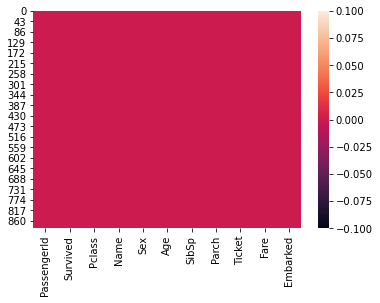

In [875]:
sns.heatmap(train_df.isnull())


In [876]:
test_df.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [877]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean() )
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean() )
test_df = test_df.dropna(axis=1, how='any', thresh = 300)

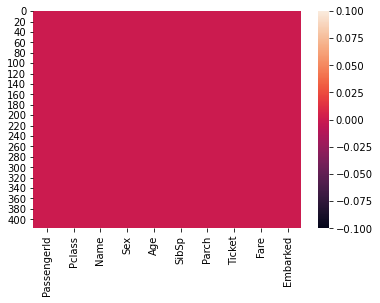

In [878]:
sns.heatmap(test_df.isnull())


In [879]:
train_df['Sex'].unique() 

array(['male', 'female'], dtype=object)

In [880]:
gender_num = {'male': 0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(gender_num)
test_df['Sex'] = test_df['Sex'].map(gender_num)

In [881]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,S


In [882]:
train_df['Pclass'].unique()

array([3, 1, 2])

In [883]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [884]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [885]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [886]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


In [887]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [888]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<Figure size 432x288 with 0 Axes>

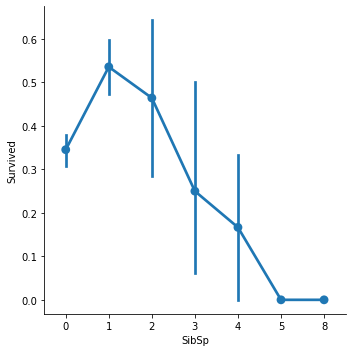

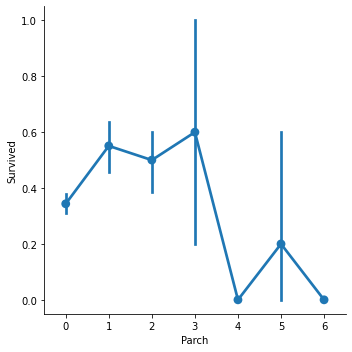

In [889]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=train_df, kind='point',  )

In [890]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


In [891]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
test_df['Family'] = test_df['SibSp'] + test_df['Parch']

In [892]:
train_df[["Family", "Survived"]].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [893]:
train_df.drop([ 'SibSp', 'Parch','Name','Ticket'], axis=1, inplace=True)
test_df.drop([ 'SibSp', 'Parch','Name','Ticket'], axis=1, inplace=True)

In [894]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3,0,34.50000,7.8292,2,0
1,893,3,1,47.00000,7.0000,0,1
2,894,2,0,62.00000,9.6875,2,0
3,895,3,0,27.00000,8.6625,0,0
4,896,3,1,22.00000,12.2875,0,2
...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,8.0500,0,0
414,1306,1,1,39.00000,108.9000,1,0
415,1307,3,0,38.50000,7.2500,0,0
416,1308,3,0,30.27259,8.0500,0,0


In [895]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,0,22.000000,7.2500,0,1
1,2,1,1,1,38.000000,71.2833,1,1
2,3,1,3,1,26.000000,7.9250,0,0
3,4,1,1,1,35.000000,53.1000,0,1
4,5,0,3,0,35.000000,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,13.0000,0,0
887,888,1,1,1,19.000000,30.0000,0,0
888,889,0,3,1,29.699118,23.4500,0,3
889,890,1,1,0,26.000000,30.0000,1,0


In [896]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x = train_df.drop("Survived", axis=1)
y = train_df["Survived"]
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state=42, test_size=.33)


In [897]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x, y)
y_pred = model.predict(x)

In [898]:
acc_decision_tree = round(model.score(x, y) * 100, 2)
acc_decision_tree


100.0

In [899]:
predictions = model.predict(test_df)


sub = pd.DataFrame() 
sub['PassengerId'] = test_df['PassengerId']
sub['Survived'] = predictions
sub.to_csv("submission.csv", index=False) 

sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
